In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Load the data into a Pandas Dataframe
df = pd.read_csv(r"data/housing_price_dataset.csv")

In [7]:
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [8]:
df.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


In [9]:
print(f"Size of the dataset: {df.shape}")

Size of the dataset: (50000, 6)


In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB
None


In [11]:
# Store the numeric columns in a list
numeric_columns = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Store the categorical columns in a list
categorical_columns = df.select_dtypes(include=["object"]).columns.tolist()


In [12]:
# Calculate the percentage of missing values in each column
# and print this information in a tabular format

missing_values = df.isnull().sum().sort_values(ascending=False)
percentage_missing_values = (missing_values / df.shape[0]) * 100
missing_value_df = pd.concat(
    [missing_values, percentage_missing_values], axis=1, keys=["Total", "Percentage"]
)
missing_value_df.head(20)

,Total,Percentage
SquareFeet,0,0.0
Bedrooms,0,0.0
Bathrooms,0,0.0
Neighborhood,0,0.0
YearBuilt,0,0.0
Price,0,0.0


In [13]:
# Calculate IQR for numeric columns only

Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Define limits for potential outliers

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Remove outliers from the numeric columns

df = df[~((df[numeric_columns] < lower_limit) | (df[numeric_columns] > upper_limit)).any(
    axis=1
)]

# Check the shape of the dataframe after outlier removal

print(f"Size of the dataset after outlier removal: {df.shape}")

Size of the dataset after outlier removal: (49941, 6)


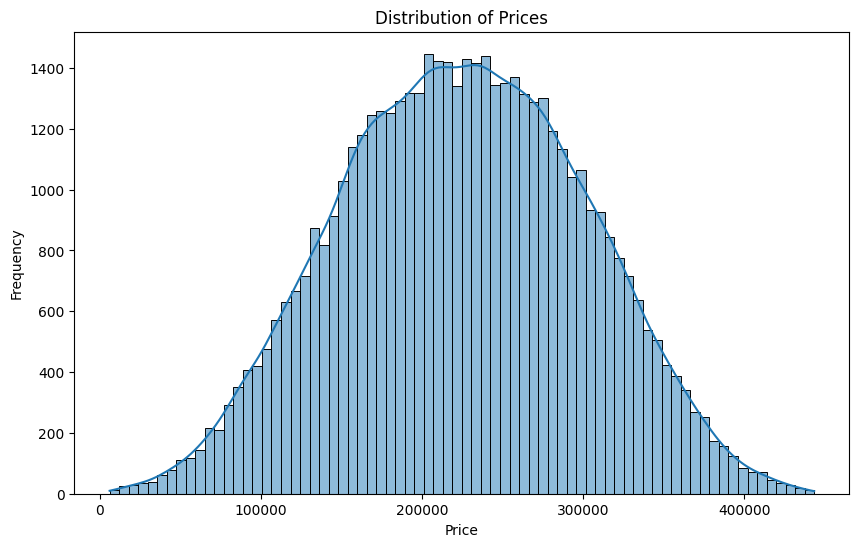

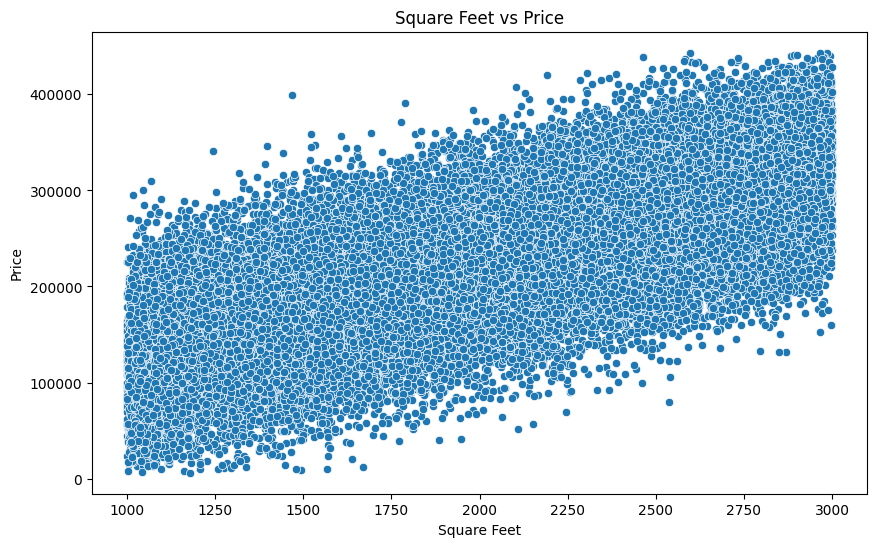

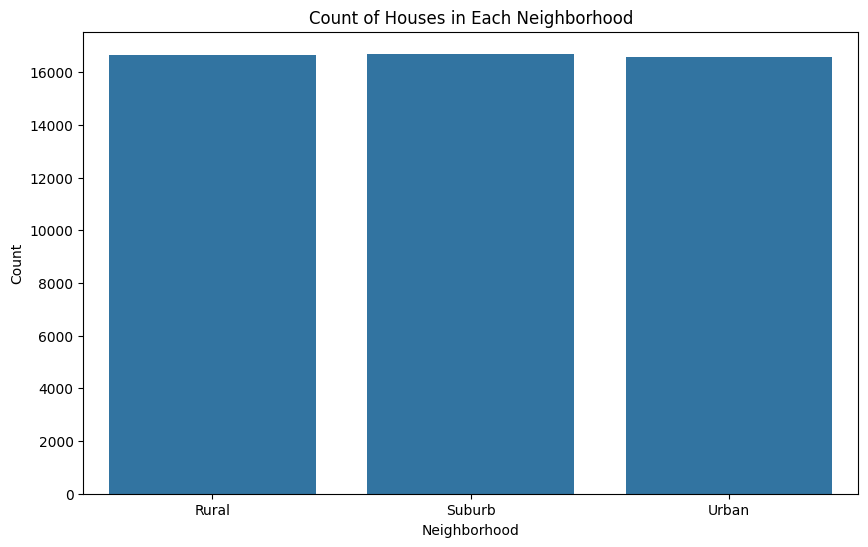

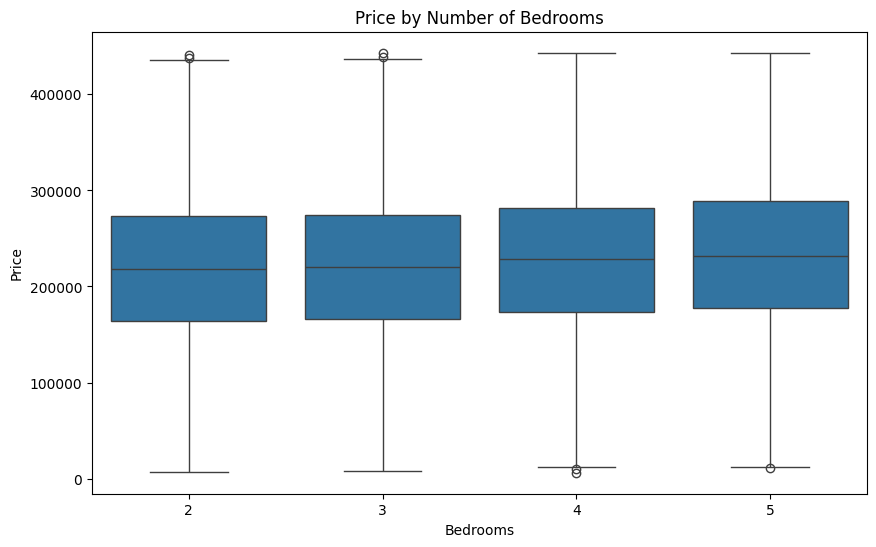

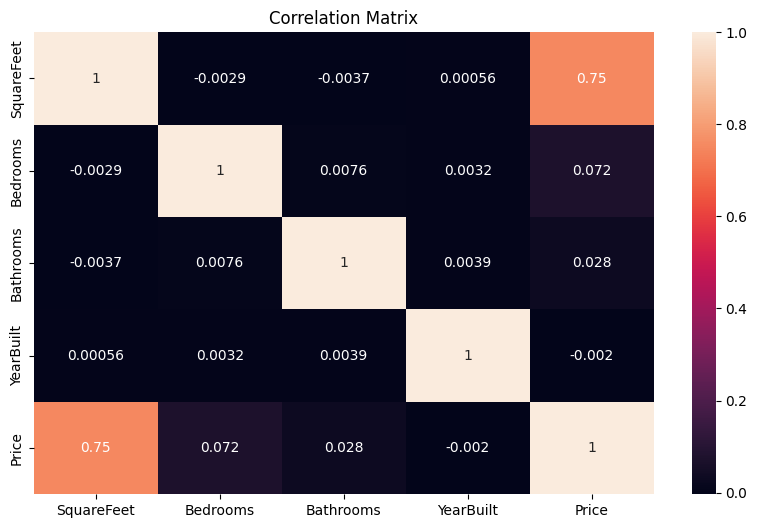

In [16]:
# Distribution of Prices
plt.figure(figsize=(10, 6))
sns.histplot(df["Price"], kde=True)
plt.title("Distribution of Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Scatter plot of Square Feet vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x="SquareFeet", y="Price", data=df)
plt.title("Square Feet vs Price")
plt.xlabel("Square Feet")
plt.ylabel("Price")
plt.show()

# Count of Houses in Each Neighborhood
plt.figure(figsize=(10, 6))
sns.countplot(x="Neighborhood", data=df)
plt.title("Count of Houses in Each Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Count")
plt.show()

# Boxplot for Price by Number of Bedrooms
plt.figure(figsize=(10, 6))
sns.boxplot(x="Bedrooms", y="Price", data=df)
plt.title("Price by Number of Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()

# Heatmap of Correlation Matrix for Numeric Columns

plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_columns].corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

array([[<Axes: title={'center': 'SquareFeet'}>,
        <Axes: title={'center': 'Bedrooms'}>],
       [<Axes: title={'center': 'Bathrooms'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'Price'}>, <Axes: >]], dtype=object)

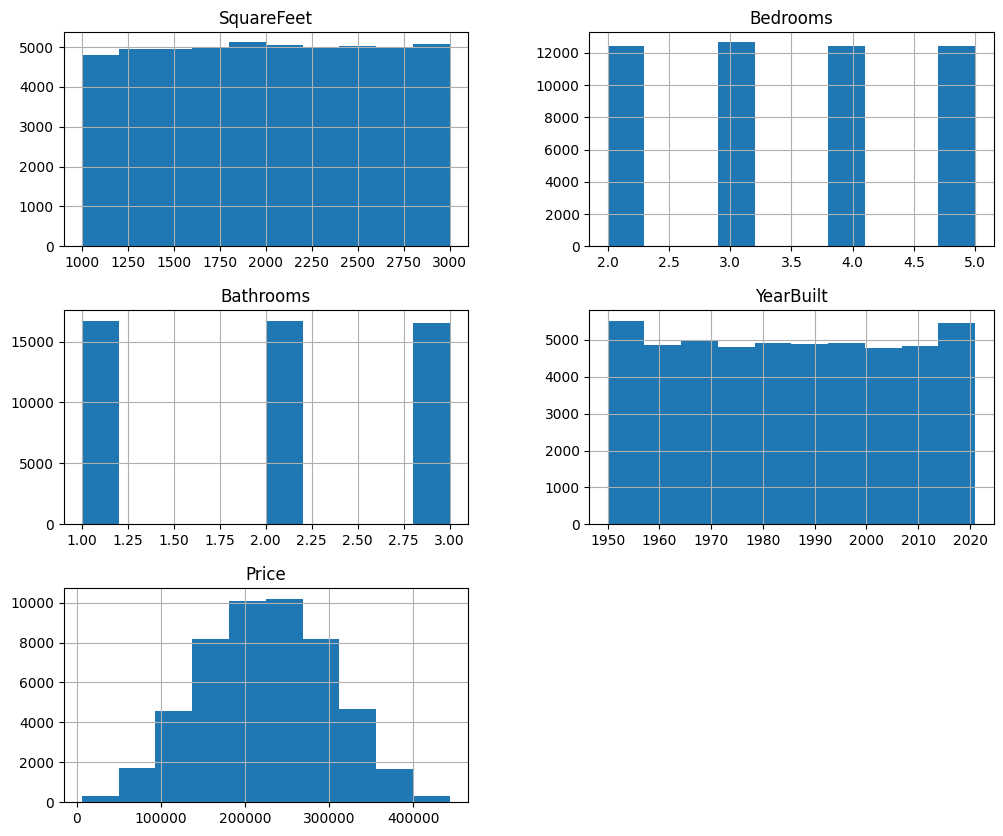

In [17]:
# Create a histogram for each numeric column

df[numeric_columns].hist(figsize=(12, 10))

In [19]:
# Store the current dataframe in parquet format

SAVE_DIR = r'processed_data'

with open(f"{SAVE_DIR}/housing_price_dataset.parquet", "wb") as f:
    df.to_parquet(f)